
###  Name : Kunal manohar Virmani
###  Roll no: D21019

 ## IML End Term Assignment
 ## The House Price Prediction Problem

#### Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

warnings.filterwarnings('ignore')



### Reading the dataset

In [2]:
df = pd.read_csv("/Users/anchalgarg/Documents/Iml/kc_house_train_data.csv - kc_house_train_data.csv.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anchalgarg/Documents/Iml/kc_house_train_data.csv - kc_house_train_data.csv.csv'

### Exploratory Data Analysis
* Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

* EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

In [ ]:
df.head(5)
## getting the top 5 rows of data to know what variables we have and what data we are working on.

In [3]:
df.describe(include='all')
#By assigning include attribute a value of ‘all’, we make sure that categorical features are also included in the result.
#The output DataFrame should look like this:
#For numerical parameters, fields like mean, standard deviation, percentiles, and maximum have been populated.
#For categorical features, count, unique, top (most frequent value), and corresponding frequency have been populated. 
#This gives us a broad idea of our dataset

NameError: name 'df' is not defined

In [216]:
df.info()
# checking the data type  of all the coloumns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### Missing Value Imputation
* We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature). We will use the isnull() function for this purpose.


In [217]:
df.isnull().sum() ### we dont have any null values for this data .
# but  finding null values is a  important step in EDA.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Observation about the data
* After looking at the data here are some beginning observations.
* Data is about the Housing industry.
* We have to do linear regression on the data to predict the dependent variable "price".
* Total no. of coloumns in the data are 21.
* We have one string colummn i.e. date.
* Our target variable is "price".
* Apart from price others are our independent variable.

### Hypothesis /Questions
* looking at the data at first here are some questions and hypothesis comeup with which might not be true after EDA.


* With first look at the data set variable like bedrooms seems to have correlation with price .In usuall cases the more the **number of bedrooms**  the higher the price of the property.


* Variable like **sqft_liv(squarefoot living )** the more the sqft made for living the more spacious the house is and  has some direct relationship with price of the property?


* **Age of the house/yr_build** has been the deciding factor always while quoting or fixing the price of property?


* **Rating of Property** being so modernized today with everything . Property do have ratings also which directly fluctuates the price.


* **location Matters/Zipcode** the more posh the location the higher the price?




In [218]:
## Dropping the coulums date and id.
#df = df.drop(['id','date'], axis=1)

### Segregating the data into Discrete and Continous variable

In [219]:
Discrete_df = df[["bedrooms","floors","waterfront","view","grade","condition"]]
Continous_df = df[["bathrooms","sqft_living","sqft_lot","sqft_above","sqft_basement","zipcode","lat","long","sqft_living15","sqft_lot15"]]
## here we are actually segregating the variables in Discrete and continous


In [220]:
df.head(5) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


### House Price Distribution

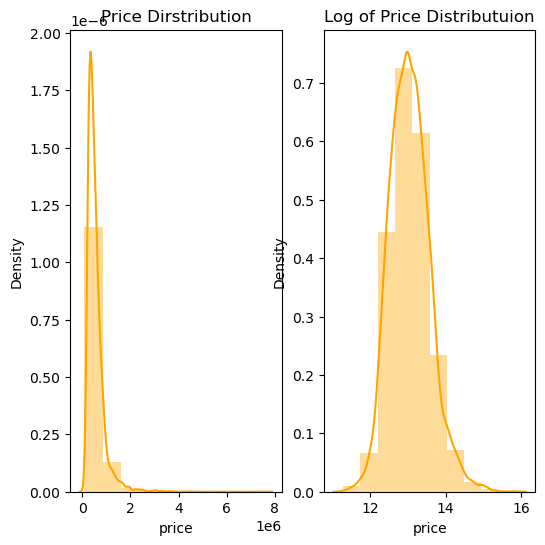

In [221]:
fig = plt.figure(figsize=(6,6))
plt.subplot(121)
plt.title('Price Dirstribution')
sns.distplot(df['price'],color='orange',bins=10);

## since price distribution is skwed to the right lets do the log to see the normal distribution of price

plt.subplot(122)
plt.title('Log of Price Distributuion')
sns.distplot(np.log(df['price']),color='orange',bins=10);
plt.show()
#With this information we can see that the prices are skewed right and some outliers lies above ~3. We will eventually want to get rid of the them to get a normal distribution of the independent variable



### Graphical Represenation of Data with Continous Predictors Variable and Target Variable Price

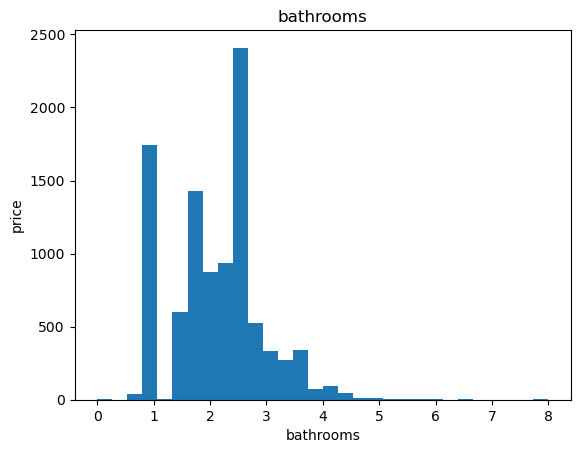

In [222]:
## Graphical Represenation of Data with Continous Predictors Variable "bathrooms"  and Target Variable "Price"

df["bathrooms"].hist(bins=30,grid = False)
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.title("bathrooms")
plt.show()


    

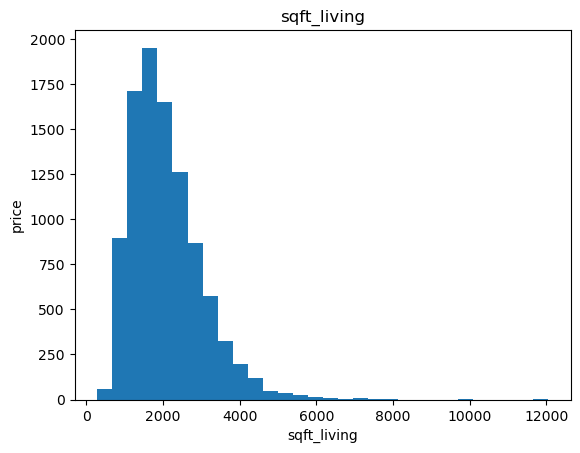

In [223]:
## Graphical Represenation of Data with Continous Predictors Variable "sqft_living"  and Target Variable "Price"

df["sqft_living"].hist(bins=30,grid = False)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("sqft_living")
plt.show()


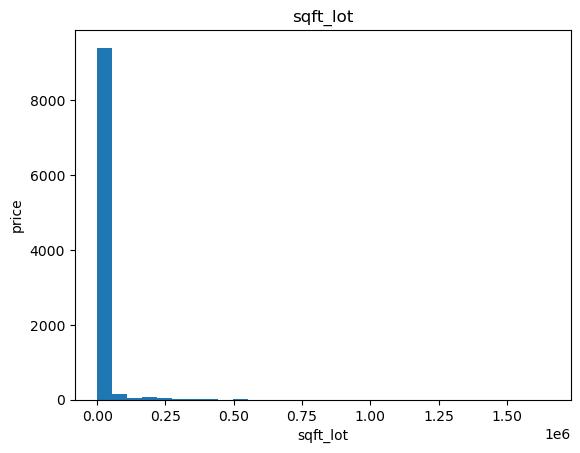

In [224]:
## Graphical Represenation of Data with Continous Predictors Variable "sqft_lot"  and Target Variable "Price"

df["sqft_lot"].hist(bins=30,grid = False)
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.title("sqft_lot")
plt.show()


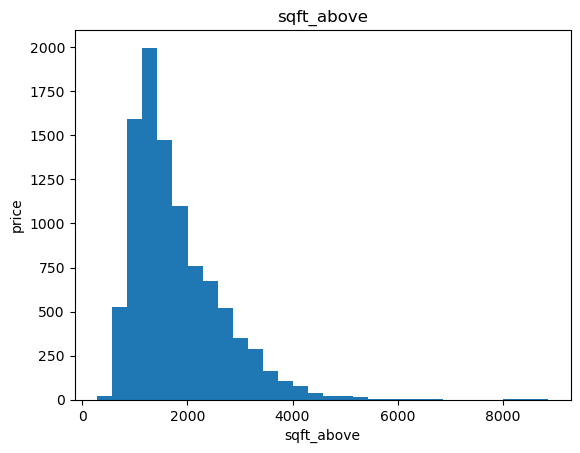

In [225]:
## Graphical Represenation of Data with Continous Predictors Variable "sqft_above"  and Target Variable "Price"

df["sqft_above"].hist(bins=30,grid = False)
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.title("sqft_above")
plt.show()


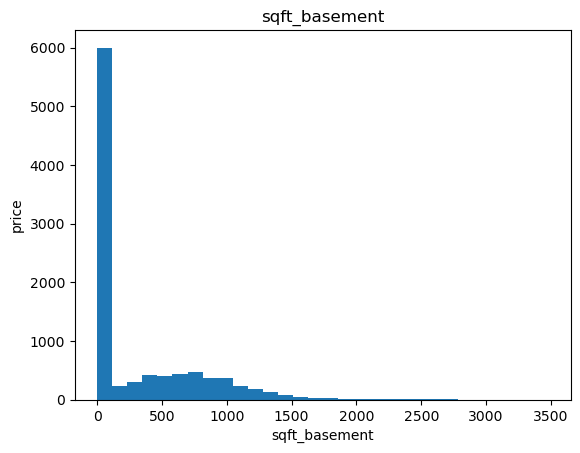

In [226]:
## Graphical Represenation of Data with Continous Predictors Variable "sqft_basement"  and Target Variable "Price"

df["sqft_basement"].hist(bins=30,grid = False)
plt.xlabel("sqft_basement")
plt.ylabel("price")
plt.title("sqft_basement")
plt.show()



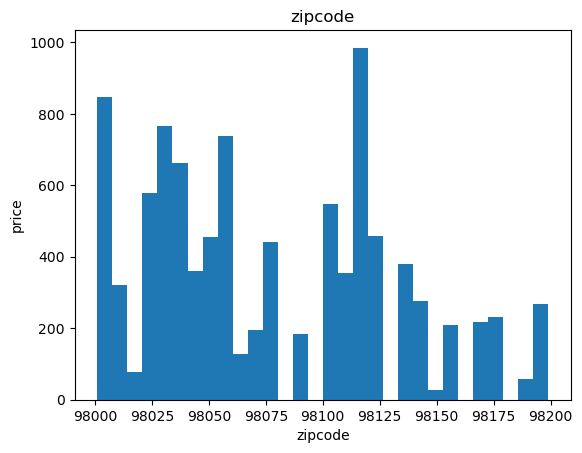

In [227]:
## Graphical Represenation of Data with Continous Predictors Variable "zipcode"  and Target Variable "Price"

df["zipcode"].hist(bins=30,grid = False)
plt.xlabel("zipcode")
plt.ylabel("price")
plt.title("zipcode")
plt.show()


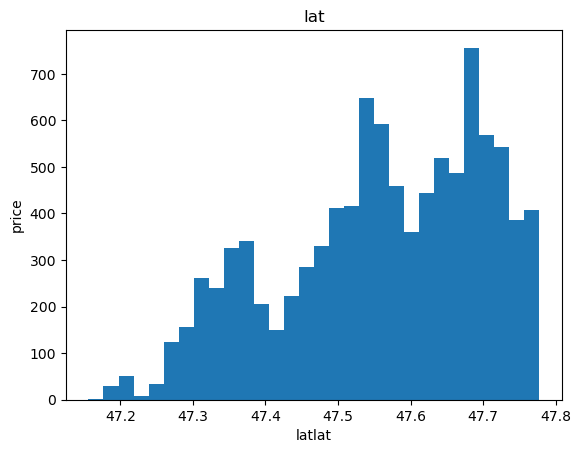

In [228]:
## Graphical Represenation of Data with Continous Predictors Variable "lat"  and Target Variable "Price"

df["lat"].hist(bins=30,grid = False)
plt.xlabel("latlat")
plt.ylabel("price")
plt.title("lat")
plt.show()


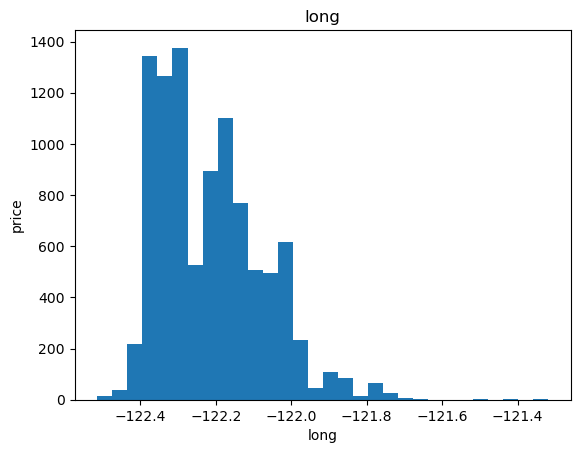

In [229]:
## Graphical Represenation of Data with Continous Predictors Variable "long"  and Target Variable "Price"

df["long"].hist(bins=30,grid = False)
plt.xlabel("long")
plt.ylabel("price")
plt.title("long")
plt.show()


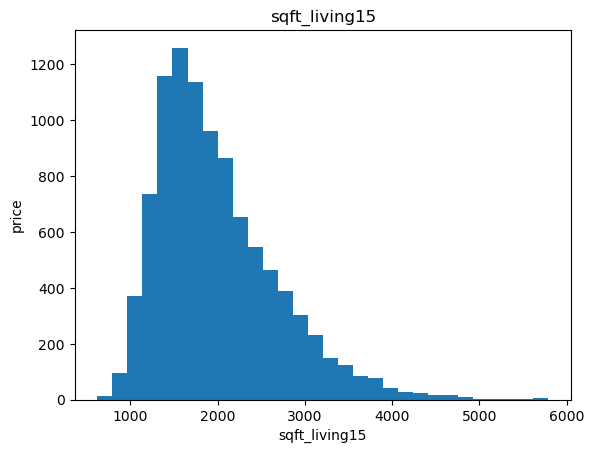

In [230]:
## Graphical Represenation of Data with Continous Predictors Variable "sqft_living15"  and Target Variable "Price"

df["sqft_living15"].hist(bins=30,grid = False)
plt.xlabel("sqft_living15")
plt.ylabel("price")
plt.title("sqft_living15")
plt.show()

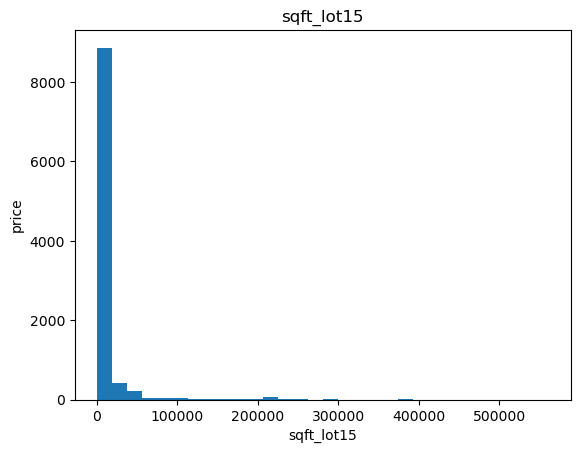

In [231]:
## Graphical Represenation of Data with Continous Predictors Variable "sqft_lot15"  and Target Variable "Price"

df["sqft_lot15"].hist(bins=30,grid = False)
plt.xlabel("sqft_lot15")
plt.ylabel("price")
plt.title("sqft_lot15")
plt.show()


###  Graphical Represenation of Data with Discrete Predictors Variable   and Target Variable "Price"


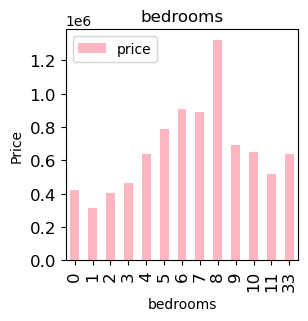

In [232]:
## Graphical Represenation of Data with Discrete Predictors Variable "bedrooms"   and Target Variable "Price"
df[["price","%s"%"bedrooms"]].groupby(["%s"%"bedrooms"]).mean().plot(kind='bar',figsize=(3,3),color="lightpink",fontsize=12)
plt.xlabel("bedrooms")
plt.ylabel('Price')
plt.title("bedrooms")
plt.show()


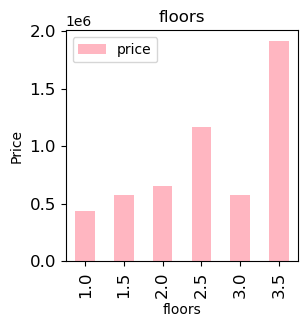

In [233]:
# Graphical Represenation of Data with Discrete Predictors Variable "floors"   and Target Variable "Price"
df[["price","%s"%"floors"]].groupby(["%s"%"floors"]).mean().plot(kind='bar',figsize=(3,3),color="lightpink",fontsize=12)
plt.xlabel("floors")
plt.ylabel('Price')
plt.title("floors")
plt.show()


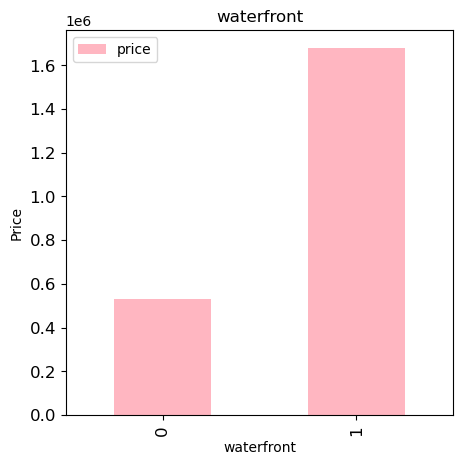

In [234]:
# Graphical Represenation of Data with Discrete Predictors Variable "floors"   and Target Variable "Price"
df[["price","%s"%"waterfront"]].groupby(["%s"%"waterfront"]).mean().plot(kind='bar',figsize=(5,5),color="lightpink",fontsize=12)
plt.xlabel("waterfront")
plt.ylabel('Price')
plt.title("waterfront")
plt.show()

#### Waterfront properties are all distributed within a specific range, without outliers.
Non-waterfront properties vary widely in price and thus have a large number of outliers.
As expected, waterfront properties are on average more expensive than regular homes - the mean price is $1,000,000 greater.

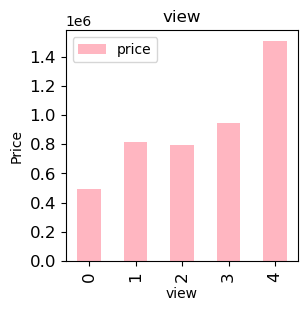

In [235]:
# Graphical Represenation of Data with Discrete Predictors Variable "view"   and Target Variable "Price"
df[["price","%s"%"view"]].groupby(["%s"%"view"]).mean().plot(kind='bar',figsize=(3,3),color="lightpink",fontsize=12)
plt.xlabel("view")
plt.ylabel('Price')
plt.title("view")
plt.show()

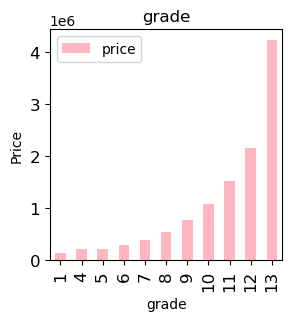

In [236]:
# Graphical Represenation of Data with Discrete Predictors Variable "grade"   and Target Variable "Price"
df[["price","%s"%"grade"]].groupby(["%s"%"grade"]).mean().plot(kind='bar',figsize=(3,3),color="lightpink",fontsize=12)
plt.xlabel("grade")
plt.ylabel('Price')
plt.title("grade")
plt.show()

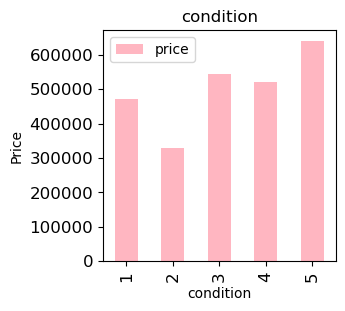

In [237]:
# Graphical Represenation of Data with Discrete Predictors Variable "condition"   and Target Variable "Price"
df[["price","%s"%"condition"]].groupby(["%s"%"condition"]).mean().plot(kind='bar',figsize=(3,3),color="lightpink",fontsize=12)
plt.xlabel("condition")
plt.ylabel('Price')
plt.title("condition")
plt.show()

##  Testing those Questions and Hypothesis
* Created Graphical Representation of the question with boxplot to check wheather our hypothesis is true or not.
* Boxplot is used to identify the outliers as well.
* A boxplot helps us in visualizing the data in terms of quartiles. It also identifies outliers in the dataset, if any. We will use the boxplot() function for this.


###  1.  House Price and Number of Bedrooms

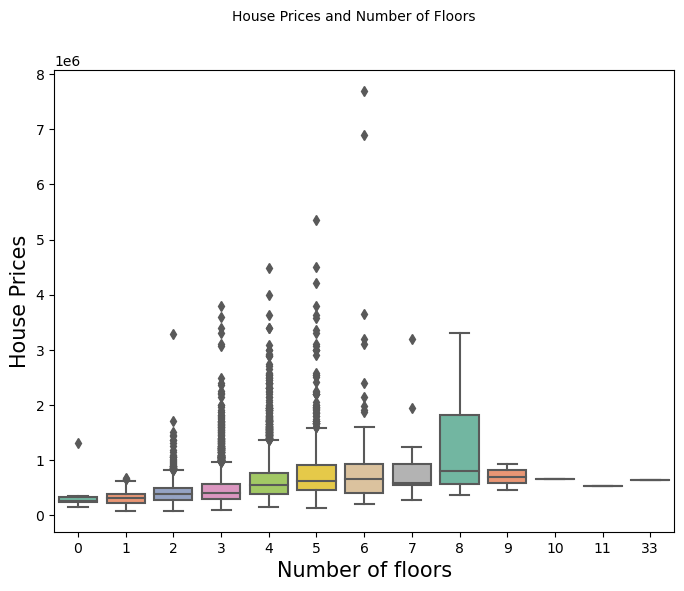

In [238]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['bedrooms'], y=df['price'], palette="Set2")
plt.suptitle('House Prices and Number of Floors', size=10)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

### Observation about House and Bedrooms
* There seems to be a general uptrend/linear relationship in price with the increase in the number of bathbedroomsrooms
* Lots of outliers exist in the data
* As the number approaches 8 bathrooms the price begins to fluctuate significantly. 

###  House Price and Water Front and Squarefoot Living

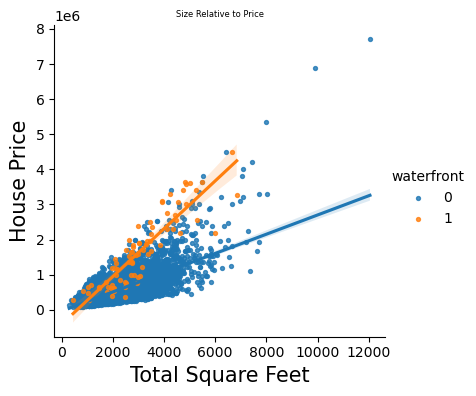

In [239]:
sns.lmplot(x='sqft_living', y='price', data=df, scatter_kws={'s':8},hue='waterfront',height=4)

plt.title('Size Relative to Price', size=6)
plt.ylabel('House Price', size=15)
plt.xlabel('Total Square Feet', size=15)


plt.show()

### Observation
* The baseline price for waterfront properties is higher on average than those without a waterfront.
* As the house size increases, the price gap significantly widens between waterfront/non waterfront houses.

### Year_Built and House Price


1900
2015


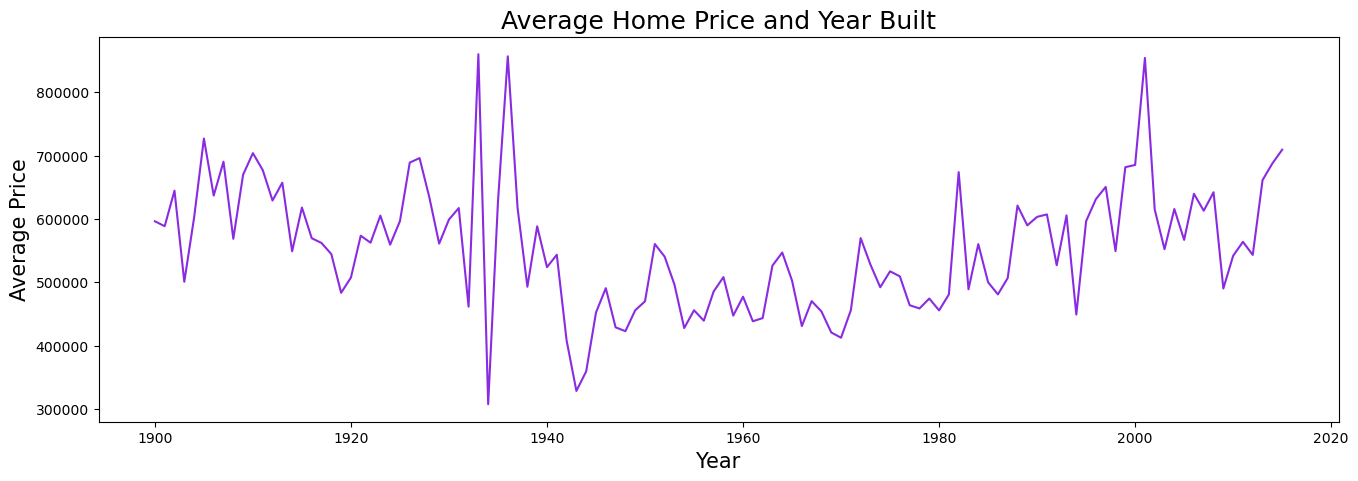

In [240]:
print(df.yr_built.min())
print(df.yr_built.max())
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df,linewidth=1.5, color='blueviolet', ci=None)

plt.title('Average Home Price and Year Built', size=18)
plt.ylabel('Average Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

### Observations
* Houses built before 1940 and after 2000 have a higher average price.
* Houses approximately between 1945 - 1980 cost less on average.
* Is this possibly due to most very old houses (before 1940) having been renovated.

### Rating of the Property and House Price

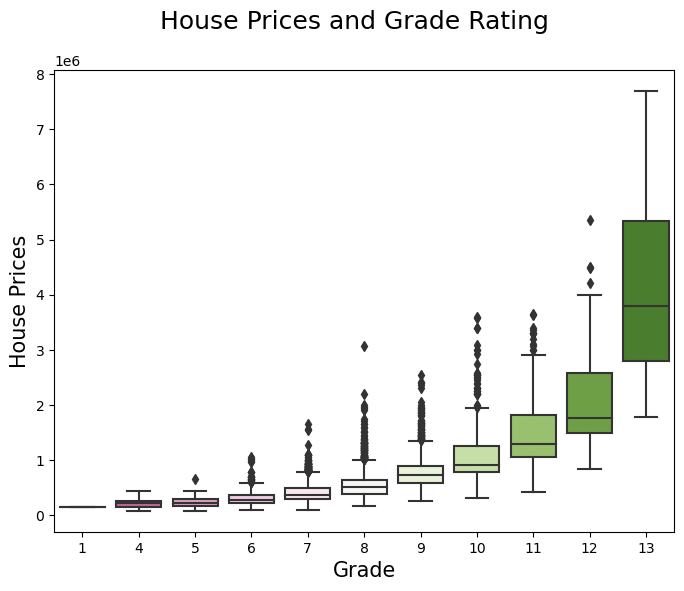

In [241]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['grade'], y=df['price'], palette="PiYG")
plt.suptitle('House Prices and Grade Rating', size=18)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)
plt.show()

### Observations
Description of Grade Rating:

"An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design."

* Many outliers in the data.
* Significant increase in the price range as the grade increases.

### Heatmap of the Numerical Variables

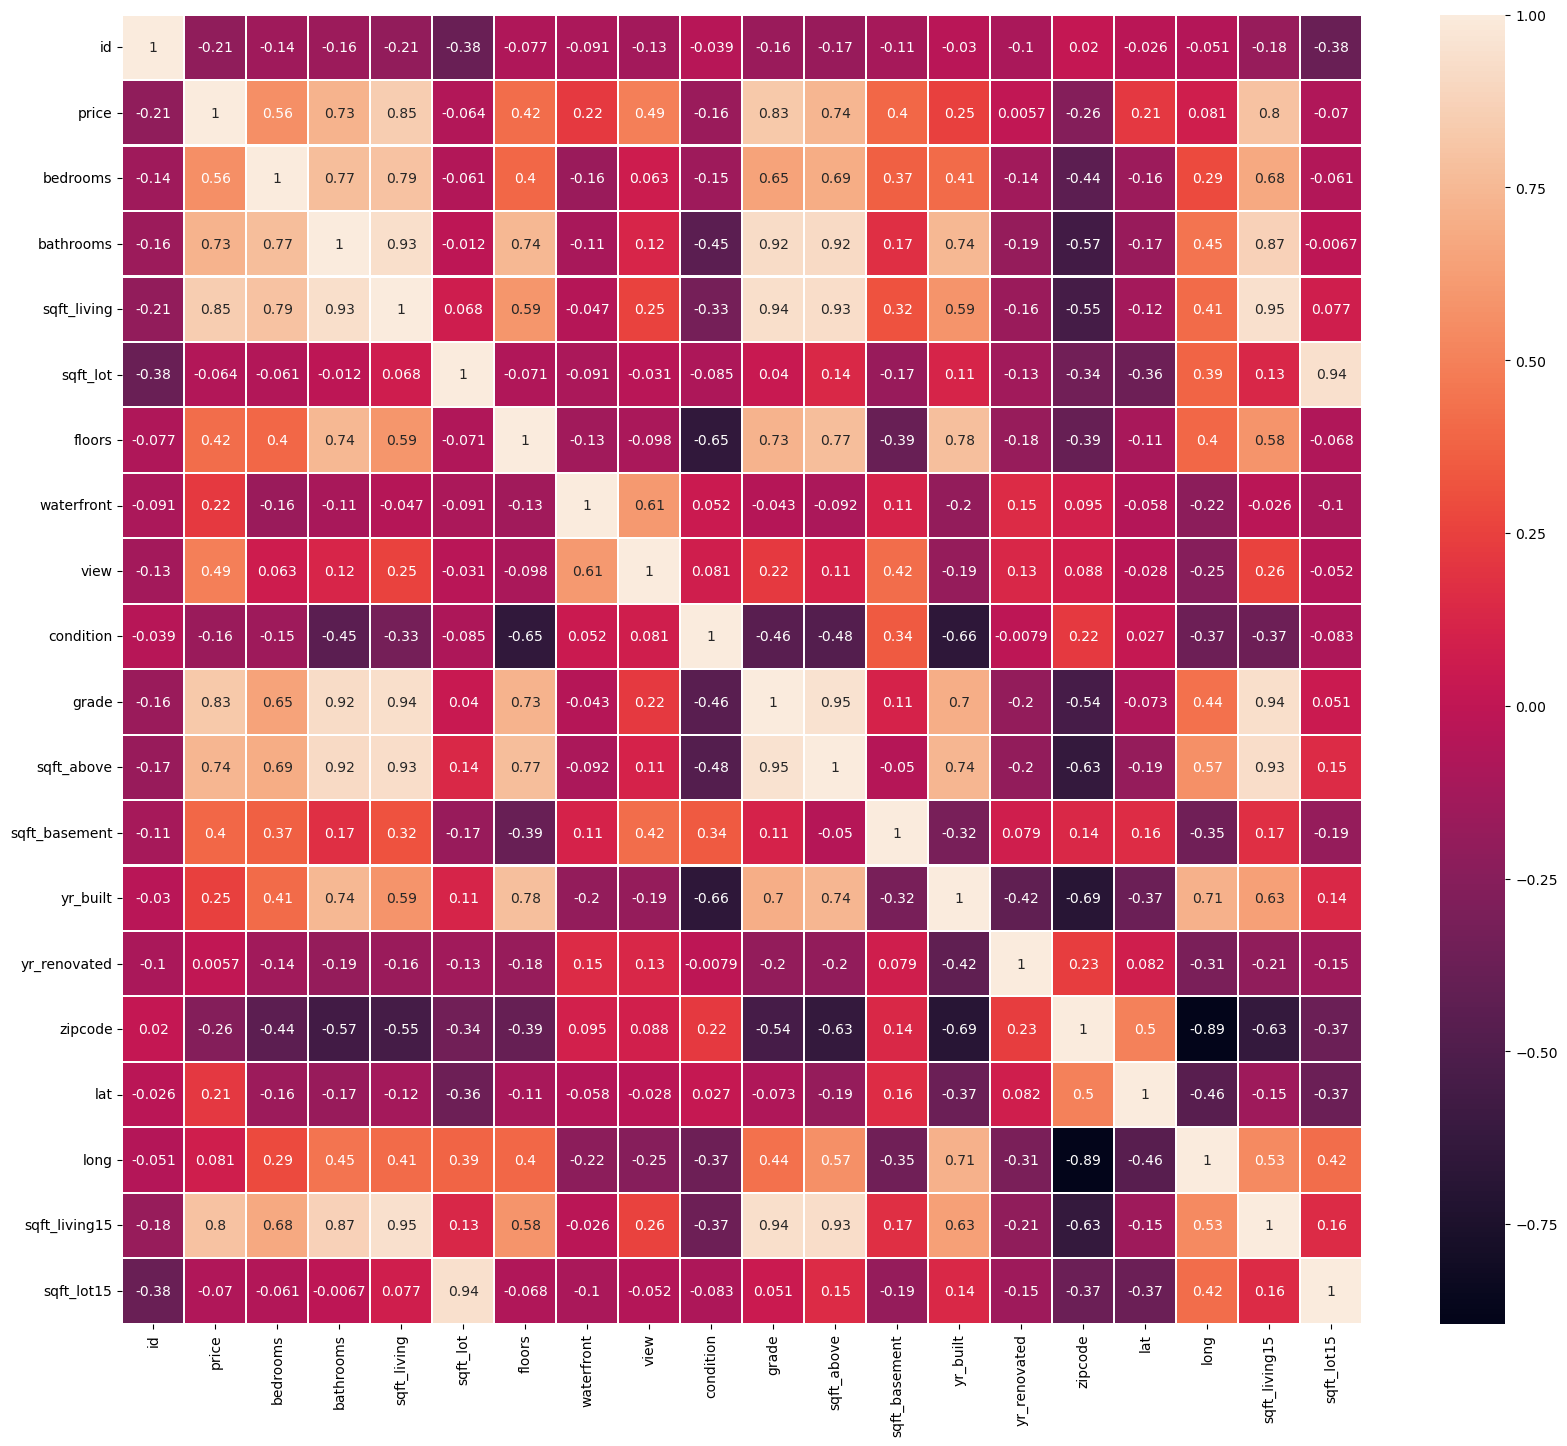

In [242]:
corr = df.corr()
plt.figure(figsize=(20,17))
sns.heatmap(corr.corr(), annot=True, square=False,linewidth=.8, cmap="rocket")
plt.yticks(rotation=0)
plt.show()

###  Initial Model Fitting 
#### FIt a couple of linear regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets. Report 10-fold cross-validation RMSE and R-squared values. Discuss the results.
### Linear Regression
#### * Creating a function called **RMSE (X,y)** which will **return RMSE,
#### * Creating a function called **R square (X,y)** which will **  r_square**
*  These functions will run on  7 predictors variable and 10 fold cross_validation to calcultae RMSE and r_square. 

In [16]:
import os
import pandas as pd
os.chdir(r"C:\Users\Dell\Downloads")
df = pd.read_csv("kc_house_train_data.csv")

In [17]:
from sklearn.model_selection import train_test_split # importing module train_test_split from sklearn library

from sklearn import linear_model # importing linear_model module from sklearn library

from sklearn import metrics

from sklearn.model_selection import cross_val_score



def RMSE(X,y) :
    
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)  # splitting the data into train 
                                                                        # and test taking test size = 30% and train size = 70%
    reg = linear_model.LinearRegression()    # defining linear regreesion model 

    scores = cross_val_score(reg,X_train,y_train,cv=10,scoring = 'neg_mean_squared_error') # using cross validation to choose as per root mean square error

    score = pd.Series((np.sqrt(-scores))) #  score  = (mean_absolute_error.mean) convertsed to root mean square error and than taken mean of same.
    


    print("Root mean square error  = "  + str(score.mean()))
    
def R_square(X,y) :
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)  # splitting the data into train 
                                                                        # and test taking test size = 30% and train size = 70%
            
    reg = linear_model.LinearRegression()    # defining linear regreesion model 
    
    scores = cross_val_score(reg,X_train,y_train,cv=10,scoring='r2') # using cross validation to choose as per root square error

    
    score = scores.mean()   # taking mean of all scores
    
    print("R-square score  = " + str(score))
    
    
    

### First  Model

In [18]:
X = df[['zipcode', 'lat', 'long']]   # Here is the second model
y = df['price']

In [19]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 354820.13392366224
R-square score  = 0.11054908008340023


### 2nd   Model

In [20]:
X = df[['yr_built','yr_renovated']]
y = df['price']

In [21]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 372853.9900519588
R-square score  = 0.01618021801280849


## 3rd model

In [22]:
X = df[['sqft_living',"waterfront", "view"]]
y = df['price']

In [23]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 249836.68052653098
R-square score  = 0.5523788149197107


##  4th model

In [97]:
X = df[[ 'lat','long','sqft_living','view','grade','waterfront','bathrooms','yr_built','yr_renovated']]
y = df['price']



In [98]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 208002.8059155824
R-square score  = 0.6915253103305365


### Observations From the Model Fitting
* Fitted a couple of linear regression model.
* Observed  that in the first model zipcode,lat,longitude has less R2.
* Observed alone **year built and year renovated** doesnot contribute much to the price.
* New set of predictors taken **sqft_living,waterfront**  shows significant increse in R2.
* Then 4rth model taken **'lat', 'long', 'sqft_living', 'view','grade', 'waterfront', 'bathrooms', 'yr_built','yr_renovated'** shows the incresed .


###  Feature Engineering 
### Problem Statement 
* 4) Feature engineering - (A) Suggest some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons, which you believe could have improved the performances of the previous models. Experiment to check if such transformations actually help to do so. (B) suggest some new feature generation techniques (e.g. creating dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature as you may convert the variable 'year built' to the 'age of the house'. Check if such transformations help in improving the performances of the models. Report the RMSE and R-squared values in each case

#### Linear regression assumes that the relationship between predictore and target linear.
#### Therefore may need to transform data to make the relationship linear, therfore log transform for an exponential relationship]
#### using logarathmic transformation , to solve the skweness and bring together the spreaded data

# transforming yr_built variable to age variable

In [80]:
df1 = df.copy()

In [101]:
age = 2015 - np.array([df.yr_built])
age = pd.DataFrame(age)
age = age.T
age.columns = ["age_house"]

In [102]:
df1["age_house"] =  age
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_house
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,14
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,73
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,88
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,38


In [103]:
X = df1[[ 'age_house','lat','long','sqft_living','view','grade','waterfront','bathrooms','yr_renovated']]
y = df1['price']

In [100]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 208002.80591558065
R-square score  = 0.6915253103305413


# square root of the property column variable 


In [104]:
sqrt_data = data1.copy()
sqrt_data["sqrt_living"] = np.sqrt(sqrt_data.sqft_living)
X = df1[['zipcode', 'lat', 'long','age_house','yr_renovated', 'view','waterfront']]
y = sqrt_data['price']

In [105]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 313600.37436633173
R-square score  = 0.3014571126998659


### Forward Selection for Linear regression

In [106]:
##### Adding variables bedrooms and zipcode

In [107]:
X = df1[[ 'zipcode','lat','long','sqft_living','view','grade','waterfront','bathrooms','bedrooms','yr_built','yr_renovated']]
y = df1['price']

In [108]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 205743.5554647089
R-square score  = 0.6982961256280795


### Backward Elimination for linear regression

In [109]:
#### removing variable Zipcode and view

In [112]:
X = df1[['lat','age_house','yr_renovated','waterfront',"bathrooms","sqft_living"]]# zipcode, view
y = df1['price']

In [113]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 227249.540262397
R-square score  = 0.6301782290230923


### Observations
* Using backward selection drop the r2  for model 5.
* Using Forward selection  increase the accuracy of the model 5.
* Will perform test data on model 5.

## Hyperparameter tuning for feature selection

In [116]:
from sklearn.model_selection import GridSearchCV
X = df1[['lat','age_house','yr_renovated','waterfront',"bathrooms","sqft_living"]]# zipcode, view
y = df1['price']
Dtree = DecisionTreeRegressor()
Dtree.fit = Dtree.fit(X,y)

In [117]:
# Hyper parameters range intialization for tuning 

parameters={"max_depth" : [1,3,5,7,9,11,12],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,12,14] }

Hypertuning_Decicion_Tree_Model = GridSearchCV(Dtree,param_grid=parameters, scoring='r2',cv=10)

Hypertuning_Decicion_Tree_Model.fit(X,y)

Hypertuning_Decicion_Tree_Model.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6)

### Decison Tree

In [114]:
X = df1[[ 'lat','long','sqft_living','view','grade','waterfront','bathrooms','yr_built','yr_renovated']]
y = df1['price']


from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor module from sklearn library

Dtree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=5)  #  defining decison tree parameters, max_dept and leaf

R_square = cross_val_score(Dtree,X,y,cv = 10,scoring = "r2")

scores = cross_val_score(Dtree,X,y,cv = 10,scoring = "neg_mean_squared_error")

RMSE = np.sqrt(abs(scores.mean()))

RSquare = R_square.mean()

print("RMSE is: ",RMSE)
print("Rsquare is: ",RSquare)

RMSE is:  231386.4583547116
Rsquare is:  0.6303524323079442


## Testing Data Using Linear regression

In [359]:
test_data = pd.read_csv("/Users/anchalgarg/Documents/Iml/kc_house_test_data.csv - kc_house_test_data.csv.csv")
test_data1 = test_data.copy()
age = 2021 - np.array([test_data1.yr_built])
age = pd.DataFrame(age)
age = age.T
age.columns = ["age_house"]
test_data1["age_house"] = age
test_data1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_house
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,18
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,121
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,100
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,92
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,52


In [122]:
X = df[[ 'lat','long','sqft_living','view','grade','waterfront','bathrooms','yr_built','yr_renovated']]
y = df['price']


In [123]:
from sklearn.model_selection import train_test_split # importing module train_test_split from sklearn library

from sklearn import linear_model # importing linear_model module from sklearn library

from sklearn import metrics

from sklearn.model_selection import cross_val_score



def RMSE(X,y) :
    
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)  # splitting the data into train 
                                                                        # and test taking test size = 30% and train size = 70%
    reg = linear_model.LinearRegression()    # defining linear regreesion model 

    scores = cross_val_score(reg,X_train,y_train,cv=10,scoring = 'neg_mean_squared_error') # using cross validation to choose as per root mean square error

    score = pd.Series((np.sqrt(-scores))) #  score  = (mean_absolute_error.mean) convertsed to root mean square error and than taken mean of same.
    


    print("Root mean square error  = "  + str(score.mean()))
    
def R_square(X,y) :
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)  # splitting the data into train 
                                                                        # and test taking test size = 30% and train size = 70%
            
    reg = linear_model.LinearRegression()    # defining linear regreesion model 
    
    scores = cross_val_score(reg,X_train,y_train,cv=10,scoring='r2') # using cross validation to choose as per root square error

    
    score = scores.mean()   # taking mean of all scores
    
    print("R-square score  = " + str(score))
    
    
    

In [124]:
RMSE(X,y)
R_square(X,y)

Root mean square error  = 208002.8059155824
R-square score  = 0.6915253103305365


### Testing data with Decison Tree


In [125]:
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor module from sklearn library

Dtree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=5)  #  defining decison tree parameters, max_dept and leaf

R_square = cross_val_score(Dtree,X,y,cv = 10,scoring = "r2")

scores = cross_val_score(Dtree,X,y,cv = 10,scoring = "neg_mean_squared_error")

RMSE = np.sqrt(abs(scores.mean()))

RSquare = R_square.mean()

print("RMSE is: ",RMSE)
print("Rsquare is: ",RSquare)

RMSE is:  231386.4583547116
Rsquare is:  0.6303524323079442


## Final Result
* 